### Documentation:
#### Data Set:5.outlier


### Data Description:

- The dataset consists of three columns and 600 rows which includes two feature columns and one label column.
- Features columns are in the form of float and continuous values ranges from [-29.969271 to 29.957195] and [-29.999631 to 34.869783] and the means are at [0.061578 and 0.470548].
- Whereas label is in the form discreate numerical int values that includes [0 and 1]. 50% of the data consists of 0 and rest consists of 1 as labels.
- There are zero duplicates and no null values consists in the dataset.
- Pattern that is formed by the input features is linear separating. 
- That means a liner line is separating 0 label and 1 label.

### Importing Libraries: The required libraries are imported at the beginning of the code.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Loading the Dataset:
The code reads a CSV file using Pandas, assuming the file is located at"C:\\Users\\dell\\Downloads\\Deep Learning data\\5.outlier.csv". The dataset is stored in the DataFrame df.

In [2]:
df = pd.read_csv("C:\\Users\\dell\\Downloads\\Deep Learning data\\5.outlier.csv",header = None)
df.head()

,0,1,2
0,-17.897000,7.662423,0
1,-26.343161,-3.055257,0
2,-19.059771,-8.531838,0
3,-16.383898,-2.352667,0
4,-12.926541,9.074994,0


#### Gives the dimensions of the dataset (number of rows, number of columns).


In [3]:
df.shape

(600, 3)

#### Provides information about the dataset, including the data types of each column and the number of non-null values.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       600 non-null    float64
 1   1       600 non-null    float64
 2   2       600 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 14.2 KB


#### Generates descriptive statistics of the dataset, such as count, mean, standard deviation, minimum, and maximum values for each numerical column. 

In [5]:
df.describe()

,0,1,2
count,600.000000,600.000000,600.000000
mean,0.061578,0.470548,0.500000
std,21.233873,12.685787,0.500417
min,-29.969271,-29.999631,0.000000
25%,-21.243866,-7.736699,0.000000
50%,2.650017,-0.377631,0.500000
75%,20.820305,9.078000,1.000000
max,29.957195,34.869783,1.000000


In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

0    0
1    0
2    0
dtype: int64

In [8]:
df[2].value_counts()

0    300
1    300
Name: 2, dtype: int64

### Data Visualization:
A scatter plot is created using Seaborn to visualize the data points, where the x-axis represents df[0], the y-axis represents df[1], and the color of the points is determined by df[2]

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

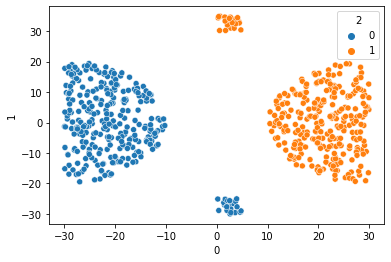

In [9]:
sns.scatterplot(df[0],df[1],hue = df[2])

### Train-Test Split:
The dataset is split into training and testing sets using the train_test_split function from scikit-learn. The features (x_train, x_test) consist of columns 0 and 1 from the DataFrame, while the target variables (y_train, y_test) correspond to column 2. The testing set size is set to 20% of the total dataset.

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[[0,1]],df[2],test_size=0.2)

### Data Preprocessing:
The features are standardized using scikit-learn's StandardScaler. The fit_transform method is applied to the training set (x_train), and the transform method is applied to the testing set (x_test).

In [11]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_trains =std.fit_transform(X_train)
X_tests =std.transform(X_test)

### Importing necessary libraries:
- TensorFlow and Keras are libraries. 
- Sequential is a linear stack of neural network layers.
- Dense represents a fully connected layer.

In [12]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

### Defining the model architecture:
- The model is created using the Sequential API. 
- It consists of five layers: one input layer with 2 units, three hidden layers with 5, 4, 3 and 2 units respectively, and an output layer with 1 unit. 
- The activation functions used in the hidden layers are hyperbolic tangent (tanh), while the output layer uses a sigmoid activation function.

In [26]:
model=Sequential()
model.add(Dense(4,activation="tanh",input_dim=2))

model.add(Dense(3,activation="tanh"))

#model.add(Dense(3,activation="tanh"))

model.add(Dense(2,activation="tanh"))

model.add(Dense(1,activation="sigmoid"))

### Model summary:
This line prints a summary of the model architecture, including the number of parameters in each layer and the total number of parameters.

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 4)                 12        
                                                                 
 dense_10 (Dense)            (None, 3)                 15        
                                                                 
 dense_11 (Dense)            (None, 2)                 8         
                                                                 
 dense_12 (Dense)            (None, 1)                 3         
                                                                 
Total params: 38
Trainable params: 38
Non-trainable params: 0
_________________________________________________________________


### Compiling the model:
The model is compiled with the Adam optimizer, binary cross-entropy loss function (suitable for binary classification problems), and accuracy as the evaluation metric.

In [28]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

### Training the model:
- The model is trained on the training data (X_train and y_train) for 50 epochs with a batch size of 20. 
- The training data is split into a training set and a validation set (20% of the data) for monitoring the validation loss and accuracy during training. 
- The training history is stored in the history object.

In [29]:
history=model.fit(X_trains,y_train,batch_size=20,epochs=50,validation_split=0.2)

Epoch 1/50
20/20 [==============================] - 1s 10ms/step - loss: 0.6795 - accuracy: 1.0000 - val_loss: 0.6741 - val_accuracy: 1.0000
Epoch 2/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6687 - accuracy: 1.0000 - val_loss: 0.6613 - val_accuracy: 1.0000
Epoch 3/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6549 - accuracy: 1.0000 - val_loss: 0.6457 - val_accuracy: 1.0000
Epoch 4/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6385 - accuracy: 1.0000 - val_loss: 0.6277 - val_accuracy: 1.0000
Epoch 5/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6200 - accuracy: 1.0000 - val_loss: 0.6080 - val_accuracy: 1.0000
Epoch 6/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6002 - accuracy: 1.0000 - val_loss: 0.5876 - val_accuracy: 1.0000
Epoch 7/50
20/20 [==============================] - 0s 3ms/step - loss: 0.5795 - accuracy: 1.0000 - val_loss: 0.5666 - val_accuracy: 1.0000
Epoch 8/50
20/20 [=

### Plotting the decision regions for the training data:
- The plot_decision_regions function from the mlxtend library to visualize the decision regions of the model on the training data. 
- The data points are plotted, and the decision regions are highlighted.
- The title, x-label, and y-label are set accordingly.

In [41]:
from mlxtend.plotting import plot_decision_regions 

<AxesSubplot:>

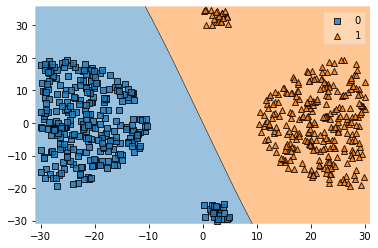

In [42]:
plot_decision_regions(df[[0,1]].values,df[2].values.astype(int),clf=model)

### Making predictions on the test data and calculating accuracy:
- The model is used to predict the outputs (y_pred) for the test data (X_tests). 
- The predicted values are then thresholded at 0.5 to obtain binary predictions (y_predf).


In [43]:
y_pred=model.predict(X_tests)

In [44]:

y_predf = np.array([1 if x>0.5 else 0 for x in y_pred])

#### Computing the accuracy of the predictions is calculated using the accuracy_score function from scikit-learn by comparing the predicted values (y_predf) with the true values (y_test).

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predf)

1.0

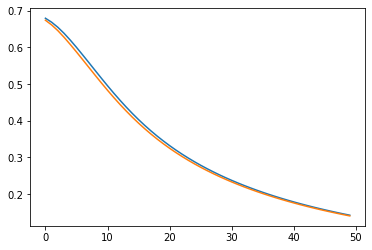

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

### Plotting the decision regions for the test data:
- The decision regions of the model on the test data (X_tests). 
- The data points are plotted, and the decision regions are shown. 
- The title, x-label, and y-label are set accordingly.

<AxesSubplot:>

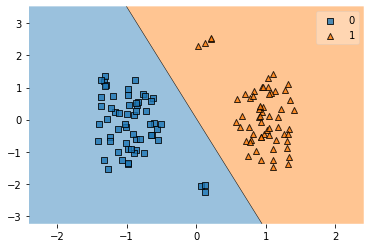

In [49]:
from mlxtend.plotting import plot_decision_regions 
plot_decision_regions(X_tests,y_test.values.astype(int),clf=model)

#### Overall, this code demonstrates the creation, training, and evaluation of a neural network model using Keras with TensorFlow backend. It also provides visualizations of the decision regions for both the training and test data.